In [327]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [328]:

df = pd.read_excel("./Data/all_important_games.xlsx")
df.drop_duplicates(subset="game_id", keep="first", inplace=True)

df1 = pd.read_excel("./Data/all_important_tournament_games.xlsx")
df1.drop_duplicates(subset="game_id", keep="first", inplace=True)




df = df.append(df1, ignore_index=True)


C:\Users\divys\AppData\Local\Temp\ipykernel_4792\3303584518.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1, ignore_index=True)


In [329]:
df.head()

,G,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,OT,W,L,Streak,Arena,team,opponent,Margin,game_id,Year
0,1,2015-11-13,7:00p,REG,H,AEC,0.93,W,78,65,NaN,1,0,W 1,Rupp Arena,Kentucky,Albany,13,Albany$Kentucky-2015-11-13,2016
1,1,2015-11-13,8:00p,REG,H,OVC,-6.04,W,80,41,NaN,1,0,W 1,Memorial Gymnasium,Vanderbilt,Austin Peay,39,Austin Peay$Vanderbilt-2015-11-13,2016
2,1,2015-11-13,8:00p,REG,A,MVC,17.39,L,63,88,NaN,0,1,L 1,Charles Koch Arena,Charleston Southern,Wichita St.,-25,Charleston Southern$Wichita State-2015-11-13,2016
3,1,2015-11-13,7:00p,REG,A,SEC,9.41,W,92,90,OT,1,0,W 1,Stegeman Coliseum,Chattanooga,Georgia,2,Chattanooga$Georgia-2015-11-13,2016
4,1,2015-11-13,5:00p,REG,N,Big 12,16.93,L,62,68,NaN,0,1,L 1,Sanford Pentagon,Colorado,Iowa St.,-6,Colorado$Iowa State-2015-11-13,2016


In [330]:
team_stats = pd.read_excel("./Data/all_cbb_data.xlsx")
team_stats = team_stats.iloc[:, : 24]



In [331]:
merged = df.merge(team_stats, left_on=['team', 'Year'], right_on=['TEAM', 'Year'])
merged


,G_x,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,2015-11-13,7:00p,REG,H,AEC,0.93,W,78,65,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
1,5,2015-11-24,9:00p,REG,H,Patriot,-6.79,W,82,62,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
2,9,2015-12-09,7:00p,REG,H,OVC,-3.53,W,88,67,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
3,13,2016-01-02,7:00p,REG,H,SEC,7.91,W,83,61,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
4,15,2016-01-09,6:00p,REG,A,SEC,7.14,W,77,61,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,29,2023-02-25,5:00p,REG,H,MAC,8.07,L,69,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.087874,NaN,NaN
9659,28,2023-03-02,7:00p,REG,A,MAAC,7.94,L,74,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.784285,NaN,NaN
9660,33,2023-03-11,7:30p,CTOURN,N,MAAC,7.94,L,55,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.784285,NaN,NaN
9661,32,2023-03-02,7:30p,CTOURN,N,OVC,-7.20,L,83,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.341730,NaN,NaN


Training Set and Testing set will be filtered to correct features and values in later steps

In [332]:
training_set = merged
training_set

,G_x,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,1,2015-11-13,7:00p,REG,H,AEC,0.93,W,78,65,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
1,5,2015-11-24,9:00p,REG,H,Patriot,-6.79,W,82,62,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
2,9,2015-12-09,7:00p,REG,H,OVC,-3.53,W,88,67,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
3,13,2016-01-02,7:00p,REG,H,SEC,7.91,W,83,61,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
4,15,2016-01-09,6:00p,REG,A,SEC,7.14,W,77,61,...,37.8,40.8,52.9,42.7,36.6,32.6,68.2,5.000000,R32,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,29,2023-02-25,5:00p,REG,H,MAC,8.07,L,69,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.087874,NaN,NaN
9659,28,2023-03-02,7:00p,REG,A,MAAC,7.94,L,74,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.784285,NaN,NaN
9660,33,2023-03-11,7:30p,CTOURN,N,MAAC,7.94,L,55,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.784285,NaN,NaN
9661,32,2023-03-02,7:30p,CTOURN,N,OVC,-7.20,L,83,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.341730,NaN,NaN


In [333]:
#test = df
training_set["Winner"] = np.where(training_set['W/L'] == 'W', training_set['team'], training_set['opponent'])
training_set.head()

,G_x,Date,Time,Type,Site,Conf,SRS,W/L,Tm,Opp,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,Winner
0,1,2015-11-13,7:00p,REG,H,AEC,0.93,W,78,65,...,40.8,52.9,42.7,36.6,32.6,68.2,5.0,R32,4.0,Kentucky
1,5,2015-11-24,9:00p,REG,H,Patriot,-6.79,W,82,62,...,40.8,52.9,42.7,36.6,32.6,68.2,5.0,R32,4.0,Kentucky
2,9,2015-12-09,7:00p,REG,H,OVC,-3.53,W,88,67,...,40.8,52.9,42.7,36.6,32.6,68.2,5.0,R32,4.0,Kentucky
3,13,2016-01-02,7:00p,REG,H,SEC,7.91,W,83,61,...,40.8,52.9,42.7,36.6,32.6,68.2,5.0,R32,4.0,Kentucky
4,15,2016-01-09,6:00p,REG,A,SEC,7.14,W,77,61,...,40.8,52.9,42.7,36.6,32.6,68.2,5.0,R32,4.0,Kentucky


SELECT FEATURES FOR TRAINING SET HERE

In [334]:
training_set = training_set[['team', 'opponent', "Winner", "W/L", "SRS", 'Site',"BARTHAG" ,"2P_O", "3P_O" ,"Year", "Type", "Date"]]
training_set = training_set.dropna() #SVM CANNOT BE TRAINED ON NA DATA

print(len(training_set))
training_set.head()
training_set.reset_index(drop=True, inplace=True)
save = training_set.copy()
save


7803


,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date
0,Kentucky,Albany,Kentucky,W,0.93,H,0.9517,52.9,36.6,2016,REG,2015-11-13
1,Kentucky,Boston University,Kentucky,W,-6.79,H,0.9517,52.9,36.6,2016,REG,2015-11-24
2,Kentucky,Eastern Kentucky,Kentucky,W,-3.53,H,0.9517,52.9,36.6,2016,REG,2015-12-09
3,Kentucky,Mississippi,Kentucky,W,7.91,H,0.9517,52.9,36.6,2016,REG,2016-01-02
4,Kentucky,Alabama,Kentucky,W,7.14,A,0.9517,52.9,36.6,2016,REG,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...
7798,Saint Peter's,Iona,Iona,L,-4.78,N,0.1854,48.8,32.5,2019,CTOURN,2019-03-08
7799,VMI,Wofford,Wofford,L,13.92,N,0.2382,47.6,35.4,2019,CTOURN,2019-03-09
7800,New Orleans,Abilene Christian,Abilene Christian,L,-1.91,N,0.2631,47.2,33.3,2019,CTOURN,2019-03-16
7801,Norfolk St.,North Carolina Central,North Carolina Central,L,-11.53,N,0.2862,46.1,37.0,2019,CTOURN,2019-03-16


After label encoding in the next steps, split the dataset into training and testing sets based on the year

In [335]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder() #label encode anything that is a string... any new added features will need to be encoded if not numerical
converted_season = training_set
converted_season["team"]=encoder.fit_transform(training_set["team"])
converted_season["opponent"]=encoder.fit_transform(training_set["opponent"])
converted_season["Site"]=encoder.fit_transform(training_set["Site"]) #if site is 1 then it is a home game, 2 is neutral, 3 is away


converted_season.head()

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date
0,135,6,Kentucky,W,0.93,1,0.9517,52.9,36.6,2016,REG,2015-11-13
1,135,26,Kentucky,W,-6.79,1,0.9517,52.9,36.6,2016,REG,2015-11-24
2,135,77,Kentucky,W,-3.53,1,0.9517,52.9,36.6,2016,REG,2015-12-09
3,135,171,Kentucky,W,7.91,1,0.9517,52.9,36.6,2016,REG,2016-01-02
4,135,3,Kentucky,W,7.14,0,0.9517,52.9,36.6,2016,REG,2016-01-09


In [336]:
converted_season["Winner"] = np.where(converted_season['W/L'] == 'W', converted_season['team'], converted_season['opponent'])
# changes the winner column to match up with the encoded winner

converted_season.head()

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date
0,135,6,135,W,0.93,1,0.9517,52.9,36.6,2016,REG,2015-11-13
1,135,26,135,W,-6.79,1,0.9517,52.9,36.6,2016,REG,2015-11-24
2,135,77,135,W,-3.53,1,0.9517,52.9,36.6,2016,REG,2015-12-09
3,135,171,135,W,7.91,1,0.9517,52.9,36.6,2016,REG,2016-01-02
4,135,3,135,W,7.14,0,0.9517,52.9,36.6,2016,REG,2016-01-09


In [337]:
converted_season = converted_season.drop(columns=["W/L"])

converted_season.head()

,team,opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date
0,135,6,135,0.93,1,0.9517,52.9,36.6,2016,REG,2015-11-13
1,135,26,135,-6.79,1,0.9517,52.9,36.6,2016,REG,2015-11-24
2,135,77,135,-3.53,1,0.9517,52.9,36.6,2016,REG,2015-12-09
3,135,171,135,7.91,1,0.9517,52.9,36.6,2016,REG,2016-01-02
4,135,3,135,7.14,0,0.9517,52.9,36.6,2016,REG,2016-01-09


In [338]:
converted_season.loc[converted_season["team"]==converted_season["Winner"],"team_game_win"]=2 #2 means that the team in the "team" column won
converted_season.loc[converted_season["team"]!=converted_season["Winner"],"team_game_win"]=1 #1 means they lost



converted_season.head()

,team,opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date,team_game_win
0,135,6,135,0.93,1,0.9517,52.9,36.6,2016,REG,2015-11-13,2.0
1,135,26,135,-6.79,1,0.9517,52.9,36.6,2016,REG,2015-11-24,2.0
2,135,77,135,-3.53,1,0.9517,52.9,36.6,2016,REG,2015-12-09,2.0
3,135,171,135,7.91,1,0.9517,52.9,36.6,2016,REG,2016-01-02,2.0
4,135,3,135,7.14,0,0.9517,52.9,36.6,2016,REG,2016-01-09,2.0


CORRELATION MATRIX


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: C:\Users\divys\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


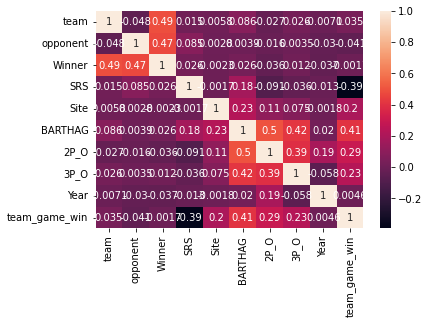

In [339]:
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
corrmtx=converted_season.corr()
sns.heatmap(corrmtx,annot=True)
plt.show()

Extract any features that have high correlation. 

TRAINING DATA will be set to entire 2016-18 seasons and testing data will be set to 2019 NCAA tournament games

In [340]:

training_set = converted_season.loc[converted_season["Year"] <= 2018] # training set 
testing_set = converted_season.loc[(converted_season["Year"] == 2019) & (converted_season["Type"] == "NCAA")] # testing set
testing_set = testing_set.loc[(testing_set["Date"] == "2019-03-21") | (testing_set["Date"] == "2019-03-22")]



print(len(testing_set))

testing_set.head()

32


,team,opponent,Winner,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date,team_game_win
5854,52,284,284,21.55,2,0.5961,53.5,39.5,2019,NCAA,2019-03-22,1.0
5878,71,201,71,-4.01,2,0.9646,58.0,30.8,2019,NCAA,2019-03-22,2.0
5985,167,28,167,-0.08,2,0.9597,54.3,37.8,2019,NCAA,2019-03-21,2.0
6009,328,248,328,12.58,2,0.8448,53.7,35.2,2019,NCAA,2019-03-21,2.0
6031,166,177,166,1.50,2,0.9665,51.8,34.2,2019,NCAA,2019-03-21,2.0


In [341]:
training_set = training_set.drop(["Year", "Type", "Date"], axis=1) #drop year and type as they are not used for predictions only for data selection
testing_set = testing_set.drop(["Year", "Type", "Date"], axis=1)

X_both = training_set.append(testing_set, ignore_index=True)
Y_both = X_both["team_game_win"]
X_both = X_both.drop(["team_game_win"], axis=1)

X_train=training_set.drop(["team_game_win"],axis=1).values
X_test = testing_set.drop(["team_game_win"],axis=1).values

print(len(X_train))
print(len(X_test))
X_train[:5]



5822
32


C:\Users\divys\AppData\Local\Temp\ipykernel_4792\34782439.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_both = training_set.append(testing_set, ignore_index=True)


array([[135.    ,   6.    , 135.    ,   0.93  ,   1.    ,   0.9517,
         52.9   ,  36.6   ],
       [135.    ,  26.    , 135.    ,  -6.79  ,   1.    ,   0.9517,
         52.9   ,  36.6   ],
       [135.    ,  77.    , 135.    ,  -3.53  ,   1.    ,   0.9517,
         52.9   ,  36.6   ],
       [135.    , 171.    , 135.    ,   7.91  ,   1.    ,   0.9517,
         52.9   ,  36.6   ],
       [135.    ,   3.    , 135.    ,   7.14  ,   0.    ,   0.9517,
         52.9   ,  36.6   ]])

In [342]:
Y_train=training_set["team_game_win"].values
Y_test = testing_set["team_game_win"].values
Y_train=Y_train.reshape(-1,1)
Y_test =Y_test.reshape(-1,1)

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

#Y_train

In [343]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

SVM CODE

In [344]:
kernels = ["linear", "rbf", "poly"]
# CS = [0.1, 1, 10]
CS = [10]

C parameter at value 10 performs the best

In [345]:
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="linear")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    linear_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.8888888888888888  | Recall:  0.5  | Accuracy:  0.71875  | F1 Score:  0.64


In [346]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="rbf")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    rbf_ypred = Y_pred
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  1.0  | Recall:  0.8125  | Accuracy:  0.90625  | F1 Score:  0.896551724137931


In [347]:
for C in CS:
    print("----------")
    print("C Value: ", C)
    svm_clf=SVC(C= C, gamma="auto", kernel="poly")
    svm_clf.fit(X_train,Y_train)
    Y_pred=svm_clf.predict(X_test)
    print("Precision: ", precision_score(Y_test, Y_pred), " | Recall: ", recall_score(Y_test, Y_pred), " | Accuracy: ", accuracy_score(Y_test, Y_pred), " | F1 Score: ", f1_score(Y_test, Y_pred))
    

----------
C Value:  10
Precision:  0.7692307692307693  | Recall:  0.625  | Accuracy:  0.71875  | F1 Score:  0.6896551724137931


In [348]:
t = pd.DataFrame.from_dict({'pred': rbf_ypred, 'actual':Y_test.flatten()})


In [349]:
t

,pred,actual
0,1.0,1.0
1,2.0,2.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0
5,2.0,2.0
6,1.0,1.0
7,2.0,2.0
8,2.0,1.0
9,2.0,2.0


In [350]:
save

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date
0,Kentucky,Albany,Kentucky,W,0.93,H,0.9517,52.9,36.6,2016,REG,2015-11-13
1,Kentucky,Boston University,Kentucky,W,-6.79,H,0.9517,52.9,36.6,2016,REG,2015-11-24
2,Kentucky,Eastern Kentucky,Kentucky,W,-3.53,H,0.9517,52.9,36.6,2016,REG,2015-12-09
3,Kentucky,Mississippi,Kentucky,W,7.91,H,0.9517,52.9,36.6,2016,REG,2016-01-02
4,Kentucky,Alabama,Kentucky,W,7.14,A,0.9517,52.9,36.6,2016,REG,2016-01-09
...,...,...,...,...,...,...,...,...,...,...,...,...
7798,Saint Peter's,Iona,Iona,L,-4.78,N,0.1854,48.8,32.5,2019,CTOURN,2019-03-08
7799,VMI,Wofford,Wofford,L,13.92,N,0.2382,47.6,35.4,2019,CTOURN,2019-03-09
7800,New Orleans,Abilene Christian,Abilene Christian,L,-1.91,N,0.2631,47.2,33.3,2019,CTOURN,2019-03-16
7801,Norfolk St.,North Carolina Central,North Carolina Central,L,-11.53,N,0.2862,46.1,37.0,2019,CTOURN,2019-03-16


In [351]:
check = save[(save['Year'] == 2019) & (save['Type']=='NCAA')]

check = check.loc[(check["Date"] == "2019-03-21") | (check["Date"] == "2019-03-22")]

check

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date
5854,Colgate,Tennessee,Tennessee,L,21.55,N,0.5961,53.5,39.5,2019,NCAA,2019-03-22
5878,Duke,North Dakota St.,Duke,W,-4.01,N,0.9646,58.0,30.8,2019,NCAA,2019-03-22
5985,Michigan St.,Bradley,Michigan St.,W,-0.08,N,0.9597,54.3,37.8,2019,NCAA,2019-03-21
6009,Villanova,Saint Mary's,Villanova,W,12.58,N,0.8448,53.7,35.2,2019,NCAA,2019-03-21
6031,Michigan,Montana,Michigan,W,1.50,N,0.9665,51.8,34.2,2019,NCAA,2019-03-21
6055,Wofford,Seton Hall,Wofford,W,10.25,N,0.8892,53.9,41.4,2019,NCAA,2019-03-21
6132,Saint Louis,Virginia Tech,Virginia Tech,L,19.28,N,0.6599,47.2,30.4,2019,NCAA,2019-03-22
6153,LSU,Yale,LSU,W,5.52,N,0.9081,52.9,31.9,2019,NCAA,2019-03-21
6181,Utah St.,Washington,Washington,L,12.01,N,0.8329,54.2,35.7,2019,NCAA,2019-03-22
6225,Ohio St.,Iowa St.,Ohio St.,W,18.07,N,0.8329,49.7,34.1,2019,NCAA,2019-03-22


In [352]:
check['pred'] = t['pred'].tolist()
check['actual'] = t['actual'].tolist()
# if 2, team column won, 1 is team column loss

In [353]:

# We predict one team winning, but the other team actually won 
check[(check['actual'] != check['pred'])]

,team,opponent,Winner,W/L,SRS,Site,BARTHAG,2P_O,3P_O,Year,Type,Date,pred,actual
6181,Utah St.,Washington,Washington,L,12.01,N,0.8329,54.2,35.7,2019,NCAA,2019-03-22,2.0,1.0
6269,Mississippi St.,Liberty,Liberty,L,5.27,N,0.8980,53.4,37.7,2019,NCAA,2019-03-22,2.0,1.0
6844,Louisville,Minnesota,Minnesota,L,12.52,N,0.9023,50.6,34.2,2019,NCAA,2019-03-21,2.0,1.0


ROC Curve, Confusion Matrix, and Learning Curve

svm with linear kernel and C paramter at 10 was chosen as it performed the best  

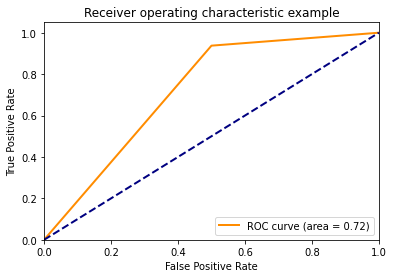

In [354]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test - 1, linear_ypred - 1)

# Compute the AUC (area under the curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


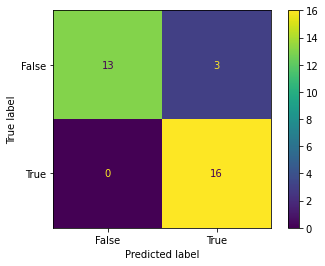

In [355]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
 
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test - 1, rbf_ypred - 1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

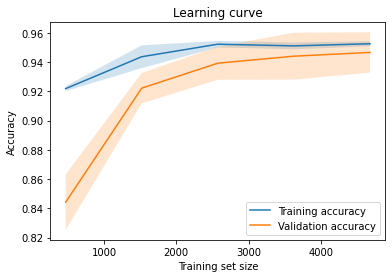

In [356]:


from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


# Create an SVM model
model = SVC(kernel='rbf', C=10)

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X_both, Y_both, cv=5, scoring='accuracy')

# Compute the mean and standard deviation of the train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.title('Learning curve')
plt.show()
